In [ ]:
# 한글 형태소 분석 ,시각화, 워드 클라우드 등. 
# 형태소 분석, 품사 태깅. 
# 데이터 : 샘플 데이터 , 페이스북 전자 신문에서 크롤링 한 임시 데이터로  대체 
# 설치 가 조금 복잡함.
# 1) jdk 17 이상 2) JPype(자바, 파이썬 연결하는 도구) 3) konlpy 패키지 설치. 

# 주의사항, JPype 버전 1.4,  파이썬 버전 3.10.7 다운그레이드 
# 시스템 환경 변수 , ex) JAVA_HOME : 경로 추가 하기. jdk 17
# 변수명 : JAVA_HOME (동일하게)
# 시스템 환경 변수의 경로 값 예제: C:\Program Files\Java\jdk-17
# 변수명 : Path
# 경로 : C:\Program Files\Java\jdk-17\bin

# 파이썬 3.10.x , 예) 3.10.7 버전으로 다운 받기. 
# 시스템 환경 변수 추가 작업

# 변수명 : Path
# 경로C:\Python\Python39\

# 변수명 : Path
# 경로C:\Python\Python39\Scripts

# cmd -> python -V

# 2) JPype(자바, 파이썬 연결하는 도구)
# 다운로드 사이트 주소 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 
# 사이트 다운로드 주소 변경 : https://github.com/jpype-project/jpype/releases
# ex) 파일명 : JPype1-1.4.1-cp310-cp310-win_amd64.whl
# JPype 검색하고, 버전은 JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl 받아서, 
# 해당 다운로드 받은 폴더 이동하고, 해당 폴더 검색경로에서, cmd 실행하고, 
# cmd -> pip install JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl
# 업그레이드 경고창 뜨면 : 
# python.exe -m pip install --upgrade pip
# 업그레이드 후 , 다시 설치 
# pip install JPype1‑1.4.0‑cp310‑cp310‑win_amd64.whl
# , 명령어 붙여넣기. 
# pip install konlpy 

# 코드 실행시, 설치한(다운그레이드한 버전, 3.10.7) 선택, 
# 해당 쥬피터 노트북 관련 커널 설치도 자동으로 함. 

In [ ]:
# 용어 정리 
## 형태소 , 형태소 분석
### 형태소: 언어에서 의미가 가장 작은 단위. 
### 형태소 분석: 형태소, 어근, 접두사/접미사, 품사 등 다양한 속성 구조. 
### 품사 태깅 예) 상용 이가 좋아 하는 음식 은 국밥 이다. 
### 음식 : NNG, 이가/JKM , 좋아하는/VV, 이다/EFN , 높임말 : 하신다 -> 신/EPH
### 품사 태깅 해주는 패키지 : Hananum, Kkma, Komoran, Okt(Twitter 제공)
### Okt , 명사 /Noun , 에/ Josa, 먹는/ Verb , 다/Eomi 

In [2]:
# 최초 실행 때는, 설치 후에 주석하기. 
# !pip install matplotlib
# !pip install wordcloud
# !pip install konlpy

In [1]:
import json
import re 
# Okt , 한글 품사 태깅하기위한 모듈, 도구.
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 
from wordcloud import WordCloud 

In [4]:
# 샘플 데이터 읽어서, 메모리에서 확인해보기. 
inputFileName = "./sampleNateNews.json"
data = json.loads(open(inputFileName,"r",encoding = "utf-8").read())
data

[{'subject': '원주시 자율방범 합동순찰대 170명 오늘 저녁 태장 2동 순찰'},
 {'subject': '국무회의 참석하는 한덕수 총리'},
 {'subject': ' 美 인플레 감축법 시행 첫해 제조업 투자 40% 지연 혹은 중단 '},
 {'subject': '한덕수 총리  국무회의 발언'},
 {'subject': '국무회의 발언하는 한덕수 총리'},
 {'subject': '정부  거부권 건의 광복절 특사 등 국무회의 심의'},
 {'subject': '한덕수 총리  국무회의 국민의례'},
 {'subject': '정부  거부권 건의 광복절 특사 등 심의'},
 {'subject': '레고랜드  LG유플러스와 여름방학 맞아 특별프로모션'},
 {'subject': '부산  택시 표시등  디자인 선호도 조사'},
 {'subject': 'LH  메타버스 등 미래기술 활용 임대주택 유지보수'},
 {'subject': '얼음팩으로 겨우 버티는 12살 딸 밤낮 없는 폭염에 서러운 이들'},
 {'subject': '반도체 생산 온실가스 배출 주범은  83%가  전기 소비 '},
 {'subject': ' 티메프  회생절차 협의회 오늘 첫 개최 자구안 논의한다'},
 {'subject': '국무회의  거부권 건의 광복절 특사 등 심의'},
 {'subject': '나홀로 사장님 지키는 안심경광등 오세훈표 일상안심  호평 '},
 {'subject': ' 실종자 수색 골든타임 확보  전남도자치경찰위  전국 최초 수색견센터 건립한다'},
 {'subject': '세븐틴 도겸  곳곳에 인사  SE★포토 '},
 {'subject': '나라꽃의 기품 느껴져 울산 국가정원 수놓은 무궁화'},
 {'subject': '국민의례하는 국무위원들'},
 {'subject': '부산시  월드비전 부산사업본부와  가족돌봄청 소 년 지원  협약'},
 {'subject': '힐링산업  정수기 비데 시장 급성장   토종기술 경쟁력 주목 받아'},
 {'subject': 

In [5]:
# 해당 데이터에서, 기사 내용인 , message 부분의 값 추출 작업. 
# 임시 저장 문자열
message = ""
# data = [{딕션너리1},{딕션너리2},{딕션너리3},...]
for item in data:
  if "subject" in item.keys():
    # (\w : 문자, 숫자 의미 ) 앞에 ^(not) 가 아닌 것은 모두 -> 공백으로 변경함. 
    # 하나의 임시 메세지 문자열 변수에 담기
    message = message + re.sub(r"[^\w]"," ", item["subject"]) + ""
message

'원주시 자율방범 합동순찰대 170명 오늘 저녁 태장 2동 순찰국무회의 참석하는 한덕수 총리 美 인플레 감축법 시행 첫해 제조업 투자 40  지연 혹은 중단 한덕수 총리  국무회의 발언국무회의 발언하는 한덕수 총리정부  거부권 건의 광복절 특사 등 국무회의 심의한덕수 총리  국무회의 국민의례정부  거부권 건의 광복절 특사 등 심의레고랜드  LG유플러스와 여름방학 맞아 특별프로모션부산  택시 표시등  디자인 선호도 조사LH  메타버스 등 미래기술 활용 임대주택 유지보수얼음팩으로 겨우 버티는 12살 딸 밤낮 없는 폭염에 서러운 이들반도체 생산 온실가스 배출 주범은  83 가  전기 소비  티메프  회생절차 협의회 오늘 첫 개최 자구안 논의한다국무회의  거부권 건의 광복절 특사 등 심의나홀로 사장님 지키는 안심경광등 오세훈표 일상안심  호평  실종자 수색 골든타임 확보  전남도자치경찰위  전국 최초 수색견센터 건립한다세븐틴 도겸  곳곳에 인사  SE 포토 나라꽃의 기품 느껴져 울산 국가정원 수놓은 무궁화국민의례하는 국무위원들부산시  월드비전 부산사업본부와  가족돌봄청 소 년 지원  협약힐링산업  정수기 비데 시장 급성장   토종기술 경쟁력 주목 받아 비쌀수록 잘팔린다  48만원짜리 커피집  문전성시 내년 전국 아파트 24만8713가구 입주   12년만에 최저세븐틴 도겸  캐럿들 안녕   SE 포토 삼성전기 평균 임금인상률 5 1  2024년 임단협 체결KT  LG전자와 6G 협력 나선다 포토 국무회의서  광복절 특사  심의부산 유통가  이사 웨딩시즌 앞두고 대대적 가구 판촉전터졌다  프로미스나인  Supersonic   음원차트 1위 유튜브 인기급상승 MV 1위 기획  심덕섭 고창군수   지역소멸에 직면한 농촌지자체 新 생존 모델 제시 포토 김경수 조윤선 복권될까 국무회의서  광복절 특사  심의국힘  민주  권익위 국장 죽음 정쟁 수단으로 삼지 말라 BTS 블핑 이을 K팝 스타가 안 보인다 쪼그라든 엔터 4사 수익조달청 현장 중심  적극행정  기업애로 해소 앞장선다

In [6]:
# 품사 태깅, Okt 패키지 사용하기. 
nlp = Okt()
message_N = nlp.nouns(message)
message_N

['원주시',
 '자율',
 '방범',
 '합동',
 '순찰',
 '명',
 '오늘',
 '저녁',
 '태',
 '순찰',
 '국무회의',
 '참석',
 '한덕수',
 '총리',
 '인플레',
 '감축',
 '법',
 '시행',
 '해',
 '제조업',
 '투자',
 '지연',
 '중단',
 '한덕수',
 '총리',
 '국무회의',
 '발언',
 '국무회의',
 '발언',
 '한덕수',
 '총리',
 '정부',
 '거부권',
 '건의',
 '광복절',
 '특사',
 '등',
 '국무회의',
 '심의',
 '한덕수',
 '총리',
 '국무회의',
 '국민의례',
 '정부',
 '거부권',
 '건의',
 '광복절',
 '특사',
 '등',
 '심의',
 '레고랜드',
 '유플러스',
 '여름방학',
 '특별',
 '프로모션',
 '부산',
 '택시',
 '표시',
 '등',
 '디자인',
 '선호',
 '조사',
 '메타',
 '버스',
 '등',
 '미래',
 '기술',
 '활용',
 '임대주택',
 '유지',
 '보수',
 '얼음',
 '팩',
 '겨우',
 '살',
 '딸',
 '밤낮',
 '폭염',
 '이',
 '반도체',
 '생산',
 '온실가스',
 '배출',
 '범',
 '전기',
 '소비',
 '티메프',
 '회생',
 '절차',
 '협의',
 '회',
 '오늘',
 '첫',
 '개최',
 '논의',
 '국무회의',
 '거부권',
 '건의',
 '광복절',
 '특사',
 '등',
 '심의',
 '홀로',
 '사장',
 '안심',
 '광등',
 '오세훈',
 '표',
 '일상',
 '안심',
 '호평',
 '실종자',
 '수색',
 '골든타임',
 '확보',
 '전남도',
 '자치',
 '경찰',
 '위',
 '전국',
 '최초',
 '수색',
 '견',
 '센터',
 '건립',
 '세븐',
 '틴',
 '도겸',
 '곳곳',
 '인사',
 '포토',
 '나라꽃',
 '기품',
 '울산',
 '국가',
 '정원',
 '수',
 '무궁화',
 '국민의례

In [7]:
# 집계 데이터 기본 탐색, 모델 구축 하기. 
count = Counter(message_N)
count

Counter({'포토': 75,
         '국무회의': 55,
         '지원': 35,
         '한덕수': 34,
         '위': 33,
         '개최': 32,
         '장': 27,
         '총리': 26,
         '주가': 26,
         '포착': 25,
         '주': 25,
         '법': 24,
         '수급': 24,
         '사업': 23,
         '속보': 22,
         '공개': 22,
         '채령': 21,
         '주재': 21,
         '건설': 21,
         '출시': 20,
         '등': 19,
         '외국인': 19,
         '철회': 18,
         '증권': 18,
         '광복절': 17,
         '최대': 17,
         '트럼프': 17,
         '투자': 16,
         '인사': 16,
         '시장': 16,
         '독립기념관': 16,
         '기관': 16,
         '금융': 16,
         '공격': 16,
         '컴백': 16,
         '발언': 15,
         '첫': 15,
         '매수': 15,
         '가을': 15,
         '머스크': 15,
         '영업': 15,
         '기술': 14,
         '센터': 14,
         '세븐': 14,
         '틴': 14,
         '연속': 14,
         '한국': 14,
         '중앙': 14,
         '것': 14,
         '부동산': 14,
         '개발': 14,
         '관리': 14,
         

In [8]:
# 임시 딕션너리에 담아서, 필요한 부분 추출해서 조사. 
word_count = dict()

# 상위 80개 정도 
for tag, counts in count.most_common(100):
  if(len(str(tag))>1):
    word_count[tag] = counts
    # print(f" tag : {tag}, counts : {counts}")
word_count

{'포토': 75,
 '국무회의': 55,
 '지원': 35,
 '한덕수': 34,
 '개최': 32,
 '총리': 26,
 '주가': 26,
 '포착': 25,
 '수급': 24,
 '사업': 23,
 '속보': 22,
 '공개': 22,
 '채령': 21,
 '주재': 21,
 '건설': 21,
 '출시': 20,
 '외국인': 19,
 '철회': 18,
 '증권': 18,
 '광복절': 17,
 '최대': 17,
 '트럼프': 17,
 '투자': 16,
 '인사': 16,
 '시장': 16,
 '독립기념관': 16,
 '기관': 16,
 '금융': 16,
 '공격': 16,
 '컴백': 16,
 '발언': 15,
 '매수': 15,
 '가을': 15,
 '머스크': 15,
 '영업': 15,
 '기술': 14,
 '센터': 14,
 '세븐': 14,
 '연속': 14,
 '한국': 14,
 '중앙': 14,
 '부동산': 14,
 '개발': 14,
 '관리': 14,
 '거부권': 13,
 '체결': 13,
 '기업': 13,
 '국무총리': 13,
 '세계': 13,
 '온유': 13,
 '복권': 12,
 '현장': 12,
 '재의': 12,
 '임명': 12,
 '촉구': 12,
 '사고': 12,
 '행사': 12,
 '서울': 12,
 '행진': 12,
 '정부': 11,
 '특사': 11,
 '심의': 11,
 '부산': 11,
 '도겸': 11,
 '삼성': 11,
 '전자': 11,
 '김경수': 11,
 '봉투': 11,
 '구안': 11,
 '추진': 11,
 '동시': 11,
 '추경호': 11,
 '시작': 11,
 '현대': 11,
 '강화': 11,
 '전기차': 11,
 '국방': 11,
 '의결': 10,
 '쿠팡': 10,
 '김형석': 10,
 '서비스': 10,
 '검거': 10,
 '안전': 10,
 '경기도': 10}

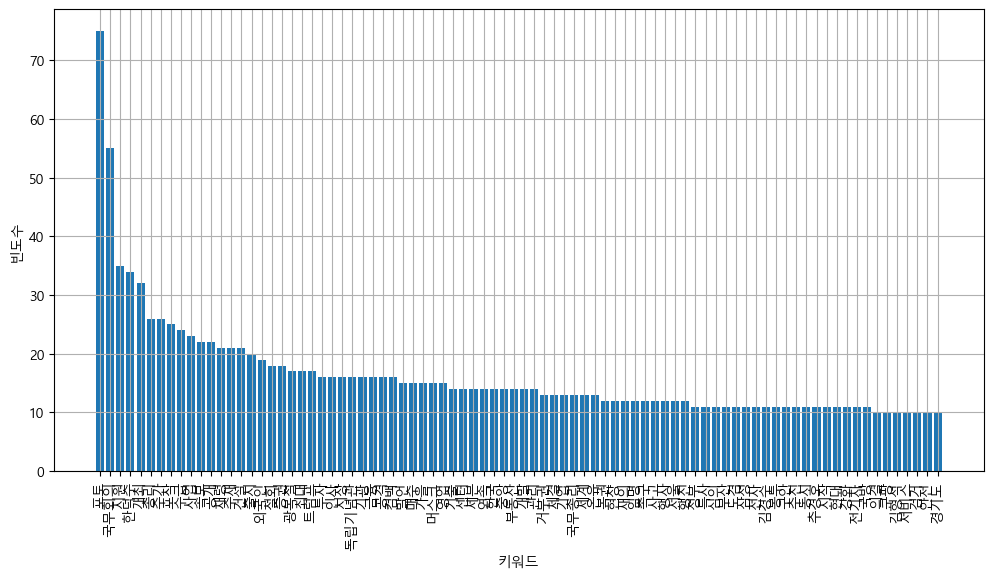

In [10]:
# 시각화1, 막대 그래프 
# 폰트 임포트 , 메모리에 설정 
font_path = "c:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

#, x축, y축, 가로x세로 비율, x 라벨, 폰트 설정 등
plt.figure(figsize=(12,6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

# 딕션너리의 키, 값 , 정렬 내림차순 
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(),reverse=True)

# 막대 그래프 그리기. 
plt.bar(range(len(word_count)), sorted_Values, align="center")

# x 축 라벨 설정. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

In [10]:
# !pip install Numpy

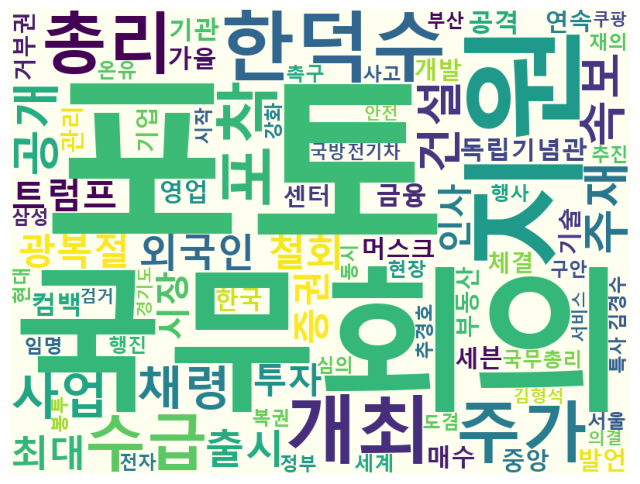

In [13]:
from wordcloud import STOPWORDS

# 워드 클라우드 시각화 
stopwords = set(STOPWORDS)
wc = WordCloud(font_path,background_color="ivory", stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis("off")
plt.show()

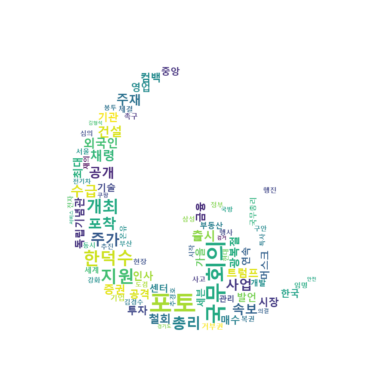

In [11]:
# 시각화2, 워드 클라우드 
import numpy as np
import os
import re
from PIL import Image
from os import path
alice_mask = np.array(Image.open("MoonCat.png"))
# 실행시, 한글이 깨져서, 해당 폰트 패스 경로 지정 필요.
wc = WordCloud(font_path, background_color="white", max_words=1000, mask=alice_mask,width=800,height=1000)
# generate word cloud
sampleImage = wc.generate_from_frequencies(word_count)
# show
plt.imshow(sampleImage, interpolation="bilinear")
# plt.imshow(sampleImage)
plt.axis("off")
plt.show()

In [10]:
# 해당 출력을 이미지로 저장 하기. 
sampleImage.to_file(inputFileName + "_cloud2.jpg")